In [1]:
import quickage
import warnings
warnings.filterwarnings("ignore")

In [2]:
folder='/users/caganze/desktop/'

In [3]:
#res=quickage.estimate_age(sourc, metal, use_jz=True, nsigma=1, plot=True, file_plot=filename)

In [4]:

#FeH = -0.38±0.07
#RV = +15±6 km/s (no Keck, could get with NIRSPEC)
#Gaia EDR: 
#π = 17.985±0.041 mas
#µra = 226.011±0.052 mas/yr
#µdec = -336.242±0.035 mas/yr

#coordinates: 04 16 31.1617564071 -28 18 52.954336524
#parallax (Gaia): 30.9326 [0.0418] mas
#proper motion (Gaia): 218.569 -251.145 [0.036 0.047]  mas/yr
#[Fe/H] = -0.03±0.09
#RV: some confusion here in the measurement, either +8.92±0.04 or +3.49±0.02 km/s - try both

import astropy.coordinates as astro_coord
import astropy.units as u

c = astro_coord.SkyCoord('04:16:31.1617564071 -28:18:52.954336524', unit=(u.hourangle, u.deg))

In [5]:
import numpy as np
p=np.random.normal( 30.9326, 0.0418, 1000)
d, dunc=np.nanmedian(1000/p), np.nanstd(1000/p)

In [6]:
sourc={'ra':c.ra.to(u.degree).value, \
        'dec': c.dec.to(u.degree).value,\
        'pmra':(218.569, 0.036),
        'pmdec':(-251.145,  0.047),
       'distance':(d, dunc),
       'rv': (3.49, 0.02 )}
        #'rv': (8.92, 0.04)}

metal= (-0.03, 0.09)

filename=folder+'/age_tessobj'

#trapp={'ra': 346.6250957,
#              'dec':-5.0428081,
#              'pmra': (922.0 , 0.6),
#              'pmdec': (-471.9, 0.9),
#              'distance':  (12.49 , 0.18),
#              'rv': (-51.688, 0.014)}
#trapp_metal=(0.04 , 0.08)

#ltteratiure 7.6 +/- 2.2

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: 


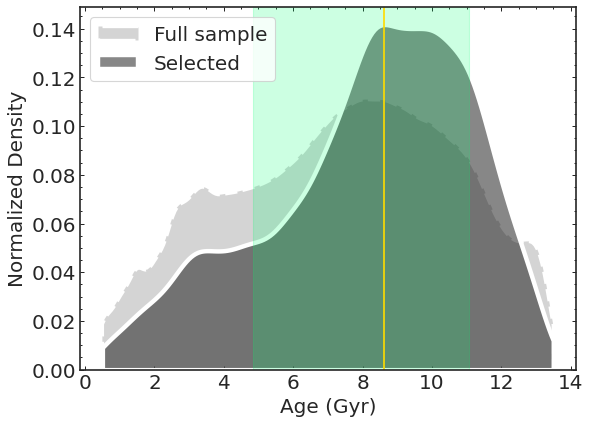

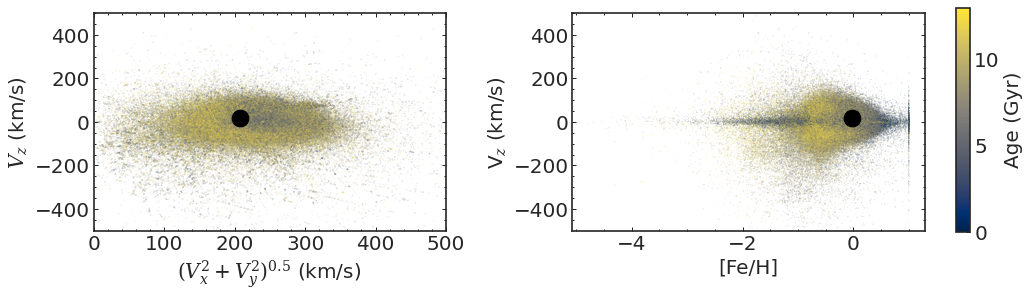

In [7]:
#select stars within vsample< v and metallicity within 1 sigma 
res=quickage.estimate_age(sourc, metal, nsigma=1,  data_set='galah',\
                          select_by=['velocity', 'metallicity'], plot=True, plot_kde=True,
                          file_plot=filename+'vellipse_met_1sigma_rv3.pdf', cmap='cividis')

In [8]:
res

{'median_age': 8.60625,
 'std_age': (3.7544363999999995, 2.4586059999999996),
 'posterior': array([10.0122 , 10.1652 ,  8.43343, ...,  5.82484, 11.0451 ,  9.60913]),
 'weights': array([1., 1., 1., ..., 1., 1., 1.])}

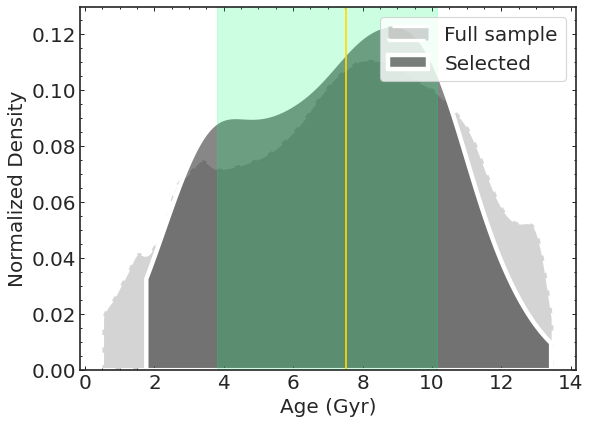

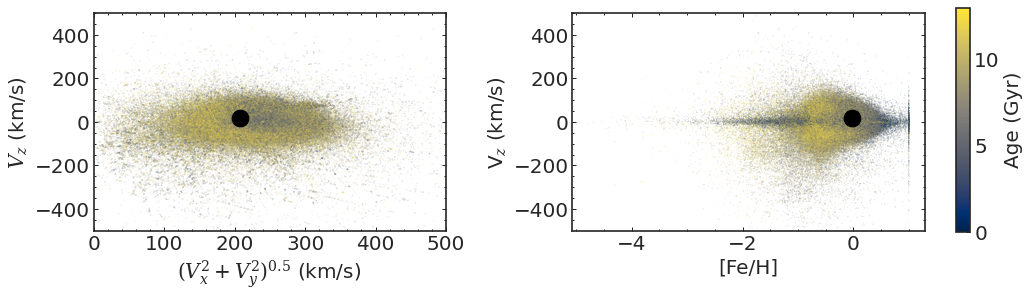

In [9]:
#select stars within |(vsample-v)|< 30 km/s and |dsample-d|< 100 pc and metallicity within 1 sigma in galah
res=quickage.estimate_age(sourc, metal, nsigma=1,  data_set='galah',\
                          select_by=['metallicity'], 
                          volume=100,
                           velocity_volume=30, plot=True, plot_kde=True,
                          file_plot=filename+'v30_d100_rv3.pdf', cmap='cividis')

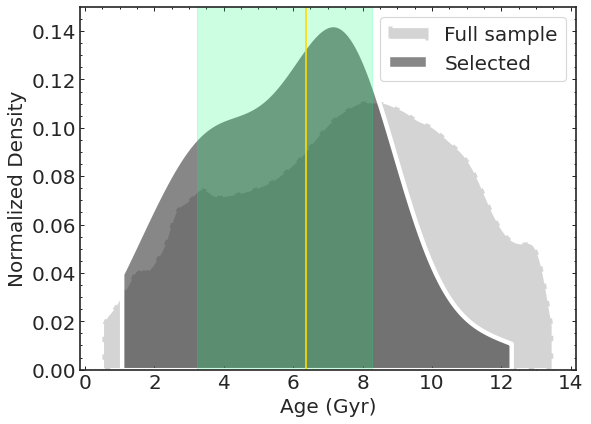

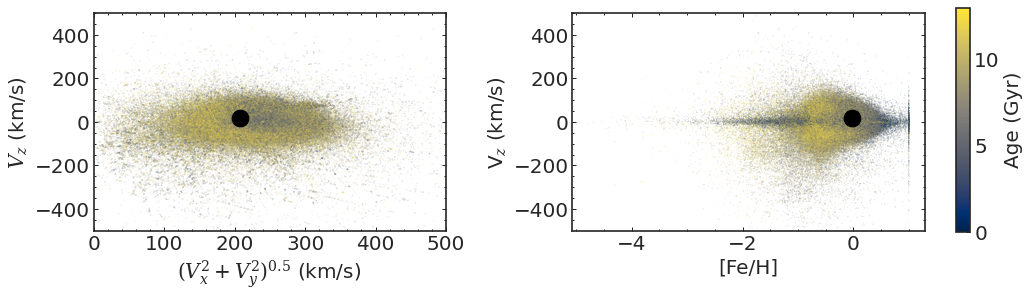

In [10]:
#select stars within |(vzsample-vz)|< 30 km/s and |vdata-vz|<30 and |dist-d|< 50 pc and metallicity within 1 sigma 
res=quickage.estimate_age(sourc, metal, nsigma=1,  data_set='galah',\
                          select_by=['metallicity'], 
                           volume=50,
                           vertical_volume=50,
                           velocity_volume=50, plot=True, plot_kde=True,
                          file_plot=filename+'v50_vz50_d50_rv3.pdf', cmap='cividis')

In [11]:
res

{'median_age': 6.3774999999999995,
 'std_age': (3.1572267999999997, 1.8897884000000005),
 'posterior': array([ 7.39575,  6.90544,  3.51802,  3.53135,  8.76584,  4.9665 ,
         2.36584,  6.70364,  3.10206,  8.10336,  3.4552 ,  4.31978,
         6.62751,  5.66236,  6.4132 ,  8.24177,  7.6222 ,  7.91211,
         2.25874,  7.44768,  3.67917, 10.7924 , 12.2866 ,  8.25841,
         6.4901 ,  1.05568,  7.05544,  6.99802,  3.90108,  2.18165,
         8.3235 ,  1.69404,  8.3139 ,  5.45202,  7.85237,  7.12033,
         9.54204,  9.4453 ,  3.24279,  1.39993,  4.84926,  4.4693 ,
         7.18998,  5.33477,  6.3418 ,  2.8436 ,  6.00756,  5.57671,
         4.23779,  8.39901]),
 'weights': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])}

In [12]:
#weird young age, maybe don't trust this part yet

In [ ]:
#select stars within 1 kpc and 500 km/s (default) and weigh them by volume over 100 iterations
#this is coded inside a nested loop so the time increases as n^2
res=quickage.estimate_age(sourc, metal, nsigma=1,  data_set='galah',\
                          select_by=['metallicity'], fweights=100, plot=True,  weighted=True,  plot_kde=True,
                          file_plot=filename+'weighted_rv3.pdf', cmap='cividis')

 49%|████████████████████▌                     | 49/100 [00:25<00:27,  1.85it/s]

In [ ]:
np.nanmedian(res['posterior']) #looks like 8Gyr, those weights are probably wrong?

In [ ]:
res